In [12]:
%matplotlib inline

In [13]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd

# files to load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# read files
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)


In [14]:
# combine the data into a single dataset
rideshare_df = pd.merge(city_data, ride_data, on="city")
# display the data table for preview
rideshare_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [15]:
# separate by type 
rural = rideshare_df.loc[rideshare_df["type"] == "Rural", :]
suburban = rideshare_df.loc[rideshare_df["type"] == "Suburban", :]
urban = rideshare_df.loc[rideshare_df["type"] == "Urban", :]

# group by city 
grouped_rural = rural.groupby(['city'])
grouped_sub = suburban.groupby(['city'])
grouped_urb = urban.groupby(['city'])

# obtain the x and y coordinates for each of the three city types
rides_r=grouped_rural['ride_id'].count()
rides_s=grouped_sub['ride_id'].count()
rides_u=grouped_urb['ride_id'].count()

fare_r=grouped_rural["fare"].mean()
fare_s=grouped_sub['fare'].mean()
fare_u=grouped_urb['fare'].mean()

# obtain number of drivers per city
driver_r=grouped_rural['driver_count'].mean()
driver_s=grouped_sub['driver_count'].mean()
driver_u=grouped_urb['driver_count'].mean()

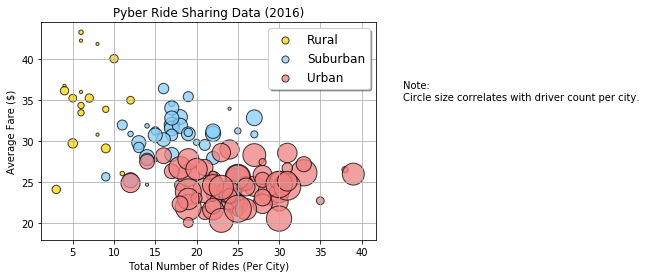

In [16]:
# plot rural, suburban, and urban rideshare data on a scatter plot 
plt.scatter(rides_r, fare_r, marker="o", facecolors="gold", edgecolors="black", label= "Rural",
            s=driver_r*10, alpha=0.75)
plt.scatter(rides_s, fare_s, marker="o", facecolors="lightskyblue", edgecolors="black", label= "Suburban",
            s=driver_s*10, alpha=0.75)
plt.scatter(rides_u, fare_u, marker="o", facecolors="lightcoral", edgecolors="black", label= "Urban",
            s=driver_u*10, alpha=0.75)

# add labels, title, legend, grid, and note
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
legend=plt.legend(loc='upper right', shadow=True, fontsize=12)
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
plt.grid()
note = ("Note:\nCircle size correlates with driver count per city.")
plt.text(45,35,note)

# save figure
plt.savefig("C:/Users/emhar/Desktop/PythonStuff/Pyber_Scatter.png", bbox_inches="tight")
plt.show()

In [17]:
# find % of total fares by city type
tot_fare_r=rural['fare'].sum()
tot_fare_s=suburban['fare'].sum()
tot_fare_u=urban['fare'].sum()
tot_fare=rideshare_df['fare'].sum()

per_fare_r=(tot_fare_r/tot_fare)*100
per_fare_s=(tot_fare_s/tot_fare)*100
per_fare_u=(tot_fare_u/tot_fare)*100


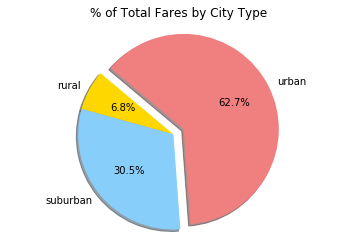

In [27]:
# plot % of total fares by city type
percent_fare=[per_fare_r, per_fare_s, per_fare_u]
type_labels=['rural', 'suburban', 'urban']
colors=['gold', 'lightskyblue', 'lightcoral']
explode=(0,0,0.12)
chart2=plt.pie(percent_fare, labels=type_labels, colors=colors,
        autopct="%1.1f%%", explode=explode, shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
plt.axis("equal")

# save figure
plt.savefig("C:/Users/emhar/Desktop/PythonStuff/Pyber_PerFare_Pie.png")

In [19]:
# find % of total rides by city type
tot_ride_r=rural['ride_id'].count()
tot_ride_s=suburban['ride_id'].count()
tot_ride_u=urban['ride_id'].count()
tot_ride=rideshare_df['ride_id'].count()

per_ride_r=(tot_ride_r/tot_ride)*100
per_ride_s=(tot_ride_s/tot_ride)*100
per_ride_u=(tot_ride_u/tot_ride)*100


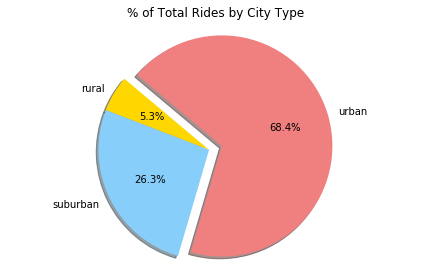

In [26]:
# plot % of total rides by city type
percent_ride=[per_ride_r, per_ride_s, per_ride_u]
plt.pie(percent_ride, labels=type_labels, colors=colors,
        autopct="%1.1f%%", explode=explode, shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')
plt.tight_layout()
plt.axis("equal")

# save figure 
plt.savefig("C:/Users/emhar/Desktop/PythonStuff/Pyber_PerRide_Pie.png")

In [21]:
# find % of total drivers by city type
tot_driver_r=driver_r.sum()
tot_driver_s=driver_s.sum()
tot_driver_u=driver_u.sum()
tot_drivers=tot_driver_r+tot_driver_s+tot_driver_u

per_drive_r=(tot_driver_r/tot_drivers)*100
per_drive_s=(tot_driver_s/tot_drivers)*100
per_drive_u=(tot_driver_u/tot_drivers)*100


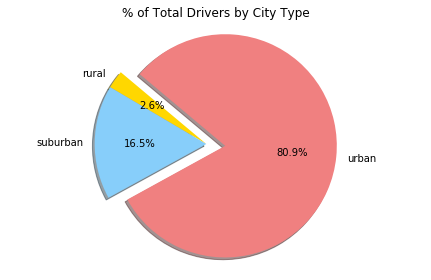

In [25]:
# plot % of total drivers by city type
percent_drive=[per_drive_r, per_drive_s, per_drive_u]
explode2=(0,0,0.17)
plt.pie(percent_drive, labels=type_labels, colors=colors,
        autopct="%1.1f%%", explode=explode2, shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')
plt.tight_layout()
plt.axis("equal")

# save figure 
plt.savefig("C:/Users/emhar/Desktop/PythonStuff/Pyber_PerDriver_Pie.png")